# Assignment3

## Import libraries

In [189]:
import os
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import logging, sys
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, SimpleRNN, GRU, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Data preprocessing & visualization 

In [190]:
df = pd.read_csv('data/Google_Stock_Price_Train.csv')

In [191]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',drop=True,inplace=True)
df['Volume'] = df['Volume'].str.replace(',', '').astype(float)
df['Close'] = df['Close'].str.replace(',', '').astype(float)

/var/folders/_6/bkb79v1n1qgb5pjgnzbz79nw0000gn/T/ipykernel_63215/949419411.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


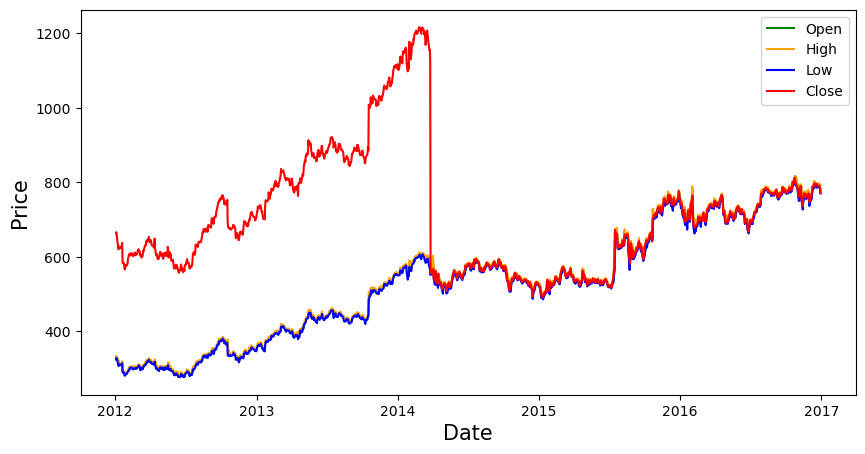

In [192]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df['Open'], label='Open', color='green')
ax.plot(df['High'], label='High', color='orange')
ax.plot(df['Low'],label='Low',color='blue')
ax.plot(df['Close'],label='Close',color='red')
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Price',size=15)
ax.legend()

fig.show()

In [193]:
df_test = pd.read_csv('data/Google_Stock_Price_Test.csv')

In [194]:
df_test['Date']=pd.to_datetime(df_test['Date'])
df_test.set_index('Date',drop=True,inplace=True)
df_test['Volume'] = df_test['Volume'].str.replace(',', '').astype(float)
# df_test['Close'] = df_test['Close'].str.replace(',', '').astype(float)

/var/folders/_6/bkb79v1n1qgb5pjgnzbz79nw0000gn/T/ipykernel_63215/4245089645.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


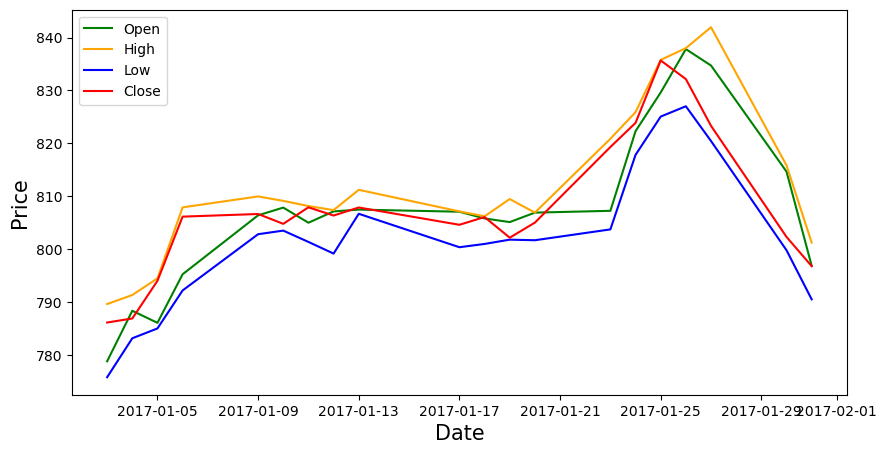

In [195]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df_test['Open'], label='Open', color='green')
ax.plot(df_test['High'], label='High', color='orange')
ax.plot(df_test['Low'],label='Low',color='blue')
ax.plot(df_test['Close'],label='Close',color='red')
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Price',size=15)
ax.legend()

fig.show()

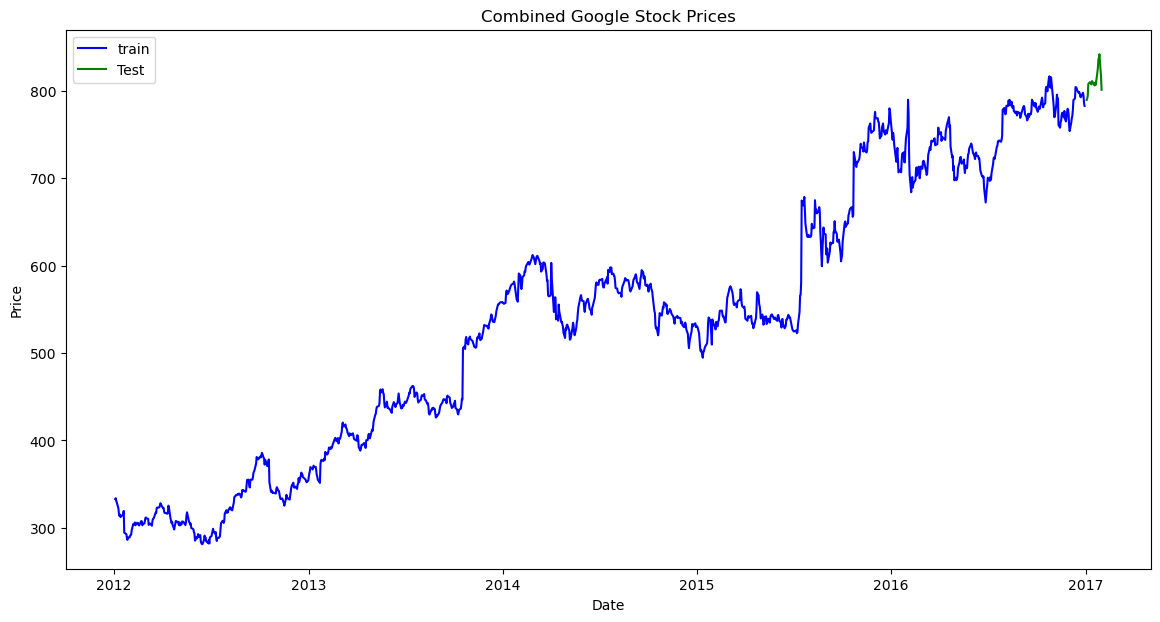

In [196]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df and df_test are already loaded and preprocessed DataFrames
# Combine the two dataframes
combined_df = pd.concat([df, df_test])

# Plot the combined data
plt.figure(figsize=(14, 7))

# Plot the part from df with one color
plt.plot(df['High'], label='train', color='blue')

# Plot the part from df_test with another color
plt.plot(df_test['High'], label='Test', color='green')

plt.title('Combined Google Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [197]:
# Scaling the 'High' feature
scaler = MinMaxScaler(feature_range=(0, 1))
df['High'] = scaler.fit_transform(df[['High']])
df_test['High'] = scaler.fit_transform(df_test[['High']])

# Splitting the data into training and validation sets
train_size = int(len(df) * 0.75)
train, validation = df[:train_size], df[train_size:]
test = df_test

In [198]:
print(validation['High'])

Date
2015-10-02    0.646404
2015-10-05    0.675668
2015-10-06    0.687321
2015-10-07    0.689861
2015-10-08    0.678357
                ...   
2016-12-23    0.955292
2016-12-27    0.964853
2016-12-28    0.958074
2016-12-29    0.942574
2016-12-30    0.936691
Name: High, Length: 315, dtype: float64


In [199]:
def create_dataset_with_dates(values, dates, look_back=1):
    X, y, X_dates = [], [], []
    for i in range(len(values) - look_back):
        X.append(values[i:(i + look_back)])
        y.append(values[i + look_back])
        X_dates.append(dates[i + look_back])  # Collects the corresponding date
    return np.array(X), np.array(y), np.array(X_dates)

## Comparison among models

Epoch 1/50
30/30 - 1s - loss: 0.0218 - val_loss: 0.0038 - 589ms/epoch - 20ms/step
Epoch 2/50
30/30 - 0s - loss: 0.0015 - val_loss: 0.0084 - 67ms/epoch - 2ms/step
Epoch 3/50
30/30 - 0s - loss: 6.5741e-04 - val_loss: 0.0076 - 66ms/epoch - 2ms/step
Epoch 4/50
30/30 - 0s - loss: 4.6514e-04 - val_loss: 0.0065 - 71ms/epoch - 2ms/step
Epoch 5/50
30/30 - 0s - loss: 4.4777e-04 - val_loss: 0.0039 - 71ms/epoch - 2ms/step
Epoch 6/50
30/30 - 0s - loss: 4.3107e-04 - val_loss: 0.0038 - 69ms/epoch - 2ms/step
Epoch 7/50
30/30 - 0s - loss: 4.0117e-04 - val_loss: 0.0052 - 70ms/epoch - 2ms/step
Epoch 8/50
30/30 - 0s - loss: 3.8924e-04 - val_loss: 0.0022 - 70ms/epoch - 2ms/step
Epoch 9/50
30/30 - 0s - loss: 4.0650e-04 - val_loss: 0.0051 - 70ms/epoch - 2ms/step
Epoch 10/50
30/30 - 0s - loss: 4.1081e-04 - val_loss: 0.0067 - 69ms/epoch - 2ms/step
Epoch 11/50
30/30 - 0s - loss: 4.8895e-04 - val_loss: 0.0030 - 70ms/epoch - 2ms/step
Epoch 12/50
30/30 - 0s - loss: 3.5589e-04 - val_loss: 0.0026 - 68ms/epoch - 2ms/

2024-12-05 21:10:23.720270: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:10:23.720771: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:10:23.721391: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

30/30 - 2s - loss: 0.0238 - val_loss: 9.8504e-04 - 2s/epoch - 50ms/step


2024-12-05 21:10:25.119717: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:10:25.120169: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:10:25.120618: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 2/50
30/30 - 0s - loss: 9.4746e-04 - val_loss: 0.0075 - 138ms/epoch - 5ms/step
Epoch 3/50
30/30 - 0s - loss: 6.9631e-04 - val_loss: 0.0034 - 137ms/epoch - 5ms/step
Epoch 4/50
30/30 - 0s - loss: 6.5230e-04 - val_loss: 0.0026 - 134ms/epoch - 4ms/step
Epoch 5/50
30/30 - 0s - loss: 6.5398e-04 - val_loss: 0.0063 - 139ms/epoch - 5ms/step
Epoch 6/50
30/30 - 0s - loss: 6.9270e-04 - val_loss: 0.0026 - 139ms/epoch - 5ms/step
Epoch 7/50
30/30 - 0s - loss: 6.7430e-04 - val_loss: 0.0019 - 140ms/epoch - 5ms/step
Epoch 8/50
30/30 - 0s - loss: 6.4134e-04 - val_loss: 0.0030 - 139ms/epoch - 5ms/step
Epoch 9/50
30/30 - 0s - loss: 6.0738e-04 - val_loss: 0.0030 - 140ms/epoch - 5ms/step
Epoch 10/50
30/30 - 0s - loss: 6.0338e-04 - val_loss: 0.0015 - 133ms/epoch - 4ms/step
Epoch 11/50
30/30 - 0s - loss: 6.4930e-04 - val_loss: 0.0028 - 133ms/epoch - 4ms/step
Epoch 12/50
30/30 - 0s - loss: 6.0863e-04 - val_loss: 0.0028 - 132ms/epoch - 4ms/step
Epoch 13/50
30/30 - 0s - loss: 5.9338e-04 - val_loss: 0.0013 -

2024-12-05 21:10:31.989852: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:10:31.990286: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:10:31.990701: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/50


2024-12-05 21:10:33.845367: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:10:33.845952: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:10:33.846409: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

29/29 - 2s - loss: 0.0224 - val_loss: 0.0010 - 2s/epoch - 55ms/step
Epoch 2/50
29/29 - 0s - loss: 0.0012 - val_loss: 0.0026 - 235ms/epoch - 8ms/step
Epoch 3/50
29/29 - 0s - loss: 6.6725e-04 - val_loss: 0.0049 - 234ms/epoch - 8ms/step
Epoch 4/50
29/29 - 0s - loss: 6.5766e-04 - val_loss: 0.0041 - 224ms/epoch - 8ms/step
Epoch 5/50
29/29 - 0s - loss: 6.3842e-04 - val_loss: 0.0030 - 223ms/epoch - 8ms/step
Epoch 6/50
29/29 - 0s - loss: 6.1413e-04 - val_loss: 0.0021 - 224ms/epoch - 8ms/step
Epoch 7/50
29/29 - 0s - loss: 6.1472e-04 - val_loss: 0.0024 - 223ms/epoch - 8ms/step
Epoch 8/50
29/29 - 0s - loss: 6.1022e-04 - val_loss: 0.0023 - 225ms/epoch - 8ms/step
Epoch 9/50
29/29 - 0s - loss: 6.0050e-04 - val_loss: 0.0017 - 222ms/epoch - 8ms/step
Epoch 10/50
29/29 - 0s - loss: 5.9791e-04 - val_loss: 0.0023 - 223ms/epoch - 8ms/step
Epoch 11/50
29/29 - 0s - loss: 5.9030e-04 - val_loss: 0.0012 - 224ms/epoch - 8ms/step
Epoch 12/50
29/29 - 0s - loss: 5.7467e-04 - val_loss: 0.0021 - 225ms/epoch - 8ms/ste

2024-12-05 21:10:46.728060: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:10:46.728499: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:10:46.729077: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/50


2024-12-05 21:10:47.091888: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:10:47.092349: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:10:47.092855: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

29/29 - 2s - loss: 0.0149 - val_loss: 0.0014 - 2s/epoch - 58ms/step
Epoch 2/50
29/29 - 0s - loss: 0.0011 - val_loss: 0.0044 - 315ms/epoch - 11ms/step
Epoch 3/50
29/29 - 0s - loss: 7.2020e-04 - val_loss: 0.0038 - 322ms/epoch - 11ms/step
Epoch 4/50
29/29 - 0s - loss: 6.8656e-04 - val_loss: 0.0039 - 310ms/epoch - 11ms/step
Epoch 5/50
29/29 - 0s - loss: 7.1180e-04 - val_loss: 0.0077 - 309ms/epoch - 11ms/step
Epoch 6/50
29/29 - 0s - loss: 7.5121e-04 - val_loss: 0.0026 - 310ms/epoch - 11ms/step
Epoch 7/50
29/29 - 0s - loss: 6.3591e-04 - val_loss: 0.0030 - 310ms/epoch - 11ms/step
Epoch 8/50
29/29 - 0s - loss: 6.2759e-04 - val_loss: 0.0031 - 314ms/epoch - 11ms/step
Epoch 9/50
29/29 - 0s - loss: 6.6090e-04 - val_loss: 0.0018 - 313ms/epoch - 11ms/step
Epoch 10/50
29/29 - 0s - loss: 5.9768e-04 - val_loss: 0.0017 - 309ms/epoch - 11ms/step
Epoch 11/50
29/29 - 0s - loss: 5.9035e-04 - val_loss: 0.0022 - 314ms/epoch - 11ms/step
Epoch 12/50
29/29 - 0s - loss: 6.2487e-04 - val_loss: 0.0015 - 313ms/epoch

2024-12-05 21:11:04.388698: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:11:04.389140: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:11:04.389556: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/50


2024-12-05 21:11:04.751749: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:11:04.752356: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:11:04.752835: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

30/30 - 2s - loss: 0.0123 - val_loss: 0.0051 - 2s/epoch - 52ms/step
Epoch 2/50


2024-12-05 21:11:06.194879: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:11:06.195401: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:11:06.196085: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

30/30 - 0s - loss: 7.9604e-04 - val_loss: 6.1582e-04 - 144ms/epoch - 5ms/step
Epoch 3/50
30/30 - 0s - loss: 3.7839e-04 - val_loss: 5.9119e-04 - 142ms/epoch - 5ms/step
Epoch 4/50
30/30 - 0s - loss: 3.5409e-04 - val_loss: 5.8526e-04 - 136ms/epoch - 5ms/step
Epoch 5/50
30/30 - 0s - loss: 3.3746e-04 - val_loss: 5.6632e-04 - 135ms/epoch - 5ms/step
Epoch 6/50
30/30 - 0s - loss: 3.3183e-04 - val_loss: 6.4281e-04 - 135ms/epoch - 5ms/step
Epoch 7/50
30/30 - 0s - loss: 3.3528e-04 - val_loss: 5.4466e-04 - 134ms/epoch - 4ms/step
Epoch 8/50
30/30 - 0s - loss: 3.1074e-04 - val_loss: 5.3622e-04 - 135ms/epoch - 4ms/step
Epoch 9/50
30/30 - 0s - loss: 3.3528e-04 - val_loss: 5.8123e-04 - 135ms/epoch - 5ms/step
Epoch 10/50
30/30 - 0s - loss: 3.1474e-04 - val_loss: 5.4343e-04 - 137ms/epoch - 5ms/step
Epoch 11/50
30/30 - 0s - loss: 2.8825e-04 - val_loss: 4.7196e-04 - 138ms/epoch - 5ms/step
Epoch 12/50
30/30 - 0s - loss: 2.8792e-04 - val_loss: 4.6071e-04 - 138ms/epoch - 5ms/step
Epoch 13/50
30/30 - 0s - loss

2024-12-05 21:11:13.166672: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:11:13.167124: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:11:13.167550: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/50


2024-12-05 21:11:13.501732: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:11:13.502160: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:11:13.502712: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

29/29 - 2s - loss: 0.0194 - val_loss: 0.0029 - 2s/epoch - 59ms/step
Epoch 2/50


2024-12-05 21:11:15.108111: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:11:15.108643: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:11:15.109358: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

29/29 - 0s - loss: 4.9089e-04 - val_loss: 8.1697e-04 - 236ms/epoch - 8ms/step
Epoch 3/50
29/29 - 0s - loss: 2.8088e-04 - val_loss: 4.7743e-04 - 237ms/epoch - 8ms/step
Epoch 4/50
29/29 - 0s - loss: 2.5373e-04 - val_loss: 4.6217e-04 - 225ms/epoch - 8ms/step
Epoch 5/50
29/29 - 0s - loss: 2.3580e-04 - val_loss: 3.6358e-04 - 227ms/epoch - 8ms/step
Epoch 6/50
29/29 - 0s - loss: 2.2498e-04 - val_loss: 3.5052e-04 - 227ms/epoch - 8ms/step
Epoch 7/50
29/29 - 0s - loss: 2.2341e-04 - val_loss: 3.8362e-04 - 229ms/epoch - 8ms/step
Epoch 8/50
29/29 - 0s - loss: 2.1628e-04 - val_loss: 2.8939e-04 - 225ms/epoch - 8ms/step
Epoch 9/50
29/29 - 0s - loss: 2.1063e-04 - val_loss: 6.8830e-04 - 229ms/epoch - 8ms/step
Epoch 10/50
29/29 - 0s - loss: 2.2856e-04 - val_loss: 2.8991e-04 - 226ms/epoch - 8ms/step
Epoch 11/50
29/29 - 0s - loss: 2.0333e-04 - val_loss: 3.0786e-04 - 224ms/epoch - 8ms/step
Epoch 12/50
29/29 - 0s - loss: 1.9688e-04 - val_loss: 3.1875e-04 - 224ms/epoch - 8ms/step
Epoch 13/50
29/29 - 0s - loss

2024-12-05 21:11:26.497384: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:11:26.497832: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:11:26.498437: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/50


2024-12-05 21:11:26.844465: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:11:26.845118: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:11:26.845616: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

29/29 - 2s - loss: 0.0193 - val_loss: 9.1980e-04 - 2s/epoch - 59ms/step
Epoch 2/50


2024-12-05 21:11:28.451679: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:11:28.452202: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:11:28.452900: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

29/29 - 0s - loss: 4.9487e-04 - val_loss: 0.0013 - 320ms/epoch - 11ms/step
Epoch 3/50
29/29 - 0s - loss: 2.8090e-04 - val_loss: 3.7359e-04 - 321ms/epoch - 11ms/step
Epoch 4/50
29/29 - 0s - loss: 2.4712e-04 - val_loss: 3.4827e-04 - 314ms/epoch - 11ms/step
Epoch 5/50
29/29 - 0s - loss: 2.3566e-04 - val_loss: 3.4322e-04 - 324ms/epoch - 11ms/step
Epoch 6/50
29/29 - 0s - loss: 2.1819e-04 - val_loss: 3.1177e-04 - 337ms/epoch - 12ms/step
Epoch 7/50
29/29 - 0s - loss: 2.0897e-04 - val_loss: 3.1742e-04 - 321ms/epoch - 11ms/step
Epoch 8/50
29/29 - 0s - loss: 2.0582e-04 - val_loss: 2.8254e-04 - 316ms/epoch - 11ms/step
Epoch 9/50
29/29 - 0s - loss: 2.0215e-04 - val_loss: 3.9831e-04 - 313ms/epoch - 11ms/step
Epoch 10/50
29/29 - 0s - loss: 2.0121e-04 - val_loss: 2.7187e-04 - 316ms/epoch - 11ms/step
Epoch 11/50
29/29 - 0s - loss: 1.9363e-04 - val_loss: 2.8114e-04 - 315ms/epoch - 11ms/step
Epoch 12/50
29/29 - 0s - loss: 1.9232e-04 - val_loss: 4.6190e-04 - 314ms/epoch - 11ms/step
Epoch 13/50
29/29 - 0s

2024-12-05 21:11:44.246986: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:11:44.247451: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:11:44.247897: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model Type: RNN, Look Back: 10, MSE: 0.0029868170004629176, MAE: 0.051637863750291946
Model Type: RNN, Look Back: 20, MSE: 0.003443740565410518, MAE: 0.05534369646667208
Model Type: RNN, Look Back: 30, MSE: 0.0017054165556435916, MAE: 0.03805262000933543
Model Type: LSTM, Look Back: 10, MSE: 0.002142686817109346, MAE: 0.04175694055956319
Model Type: LSTM, Look Back: 20, MSE: 0.0017573396429227223, MAE: 0.03793614822514863
Model Type: LSTM, Look Back: 30, MSE: 0.0009147948422396903, MAE: 0.025870100439729905
Model Type: GRU, Look Back: 10, MSE: 0.00045171046260922005, MAE: 0.016559737821030377
Model Type: GRU, Look Back: 20, MSE: 0.00027886234831721806, MAE: 0.012747228587948752
Model Type: GRU, Look Back: 30, MSE: 0.00023145311536058733, MAE: 0.010907557396875454

Part 1 - Best Model Configuration:
Model Type: GRU, Look Back: 30
MSE: 0.00023145311536058733, MAE: 0.010907557396875454
Model: RNN, Look Back: 30, X_val shape: (285, 30, 1)
9/9 [==============================] - 0s 1ms/step


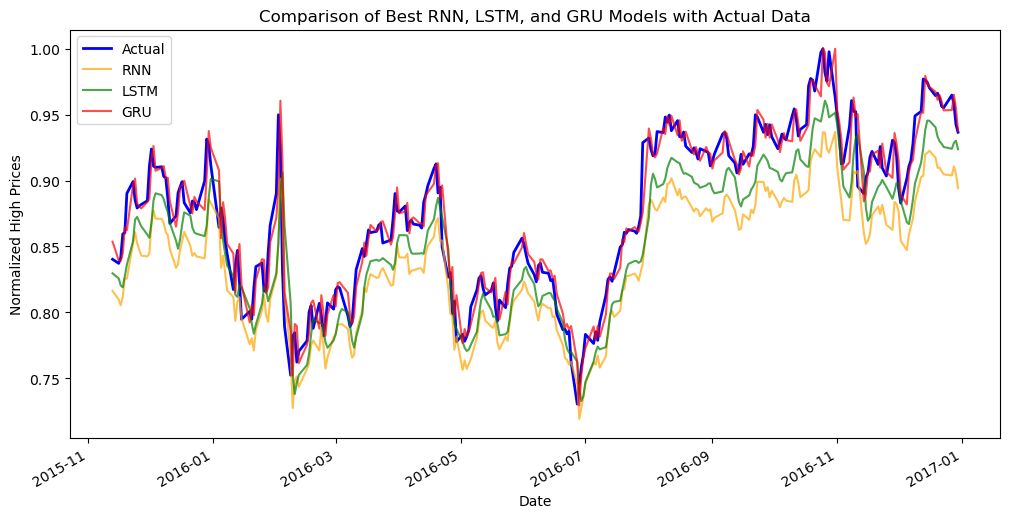

<Figure size 640x480 with 0 Axes>

In [202]:
# Part 1: Compare RNN, LSTM, GRU with Different Window Sizes Using the Adam Optimizer
# Define model initialization functions that accept an optimizer
def init_rnn(input_shape, output_units, optimizer='adam'):
    model = Sequential()
    model.add(SimpleRNN(50, input_shape=input_shape, return_sequences=True))
    model.add(SimpleRNN(50))
    model.add(Dense(output_units))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

def init_lstm(input_shape, output_units, optimizer='adam'):
    model = Sequential()
    model.add(LSTM(50, input_shape=input_shape, return_sequences=True))
    model.add(LSTM(50))
    model.add(Dense(output_units))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

def init_gru(input_shape, output_units, optimizer='adam'):
    model = Sequential()
    model.add(GRU(50, input_shape=input_shape, return_sequences=True))
    model.add(GRU(50))
    model.add(Dense(output_units))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Data preparation function including date handling
def create_dataset_with_dates(values, dates, look_back=1):
    X, y, X_dates = [], [], []
    for i in range(len(values) - look_back):
        X.append(values[i:(i + look_back)])
        y.append(values[i + look_back])
        X_dates.append(dates[i + look_back])  # Collects the corresponding date
    return np.array(X), np.array(y), np.array(X_dates)

look_backs = [10, 20, 30]
models = {'RNN': init_rnn, 'LSTM': init_lstm, 'GRU': init_gru}
models_storage = {}
performance_log = {}

# Directory for plots
plot_dir = "training_plots_part1"
os.makedirs(plot_dir, exist_ok=True)

# Training and plotting
optimizer = Adam()  # Use Adam optimizer for all models in this part
for name, init_func in models.items():
    for look_back in look_backs:
        X_train, y_train, _ = create_dataset_with_dates(train['High'].values, train.index.values, look_back)
        X_val, y_val, dates_val = create_dataset_with_dates(validation['High'].values, validation.index.values, look_back)

        X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
        X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

        model = init_func((X_train.shape[1], 1), 1, optimizer)
        history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=2)

        predictions = model.predict(X_val)
        mse = mean_squared_error(y_val, predictions)
        mae = mean_absolute_error(y_val, predictions)

        # Store the model and its performance
        key = (name, look_back)
        models_storage[key] = model
        performance_log[key] = {'MSE': mse, 'MAE': mae}

        # Plot and save training & validation loss
        plt.figure(figsize=(10, 4))
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Training and Validation Loss for {name} with Look Back {look_back}')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.savefig(os.path.join(plot_dir, f"{name}_{look_back}_loss.png"))
        plt.close()

        # Plot and save actual vs predicted values
        plt.figure(figsize=(10, 4))
        plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        plt.plot(dates_val, y_val, label='Actual', color='blue')
        plt.plot(dates_val, predictions.flatten(), label='Predicted', color='orange', alpha=0.7)
        plt.title(f'Actual vs Predicted for {name} with Look Back {look_back}')
        plt.xlabel('Date')
        plt.ylabel('Normalized Value')
        plt.legend()
        plt.gcf().autofmt_xdate(rotation=0)  # Adjust for non-inclined date labels
        plt.savefig(os.path.join(plot_dir, f"{name}_{look_back}_prediction.png"))
        plt.close()


# Outputting performance for each model configuration
for config, metrics in performance_log.items():
    print(f"Model Type: {config[0]}, Look Back: {config[1]}, MSE: {metrics['MSE']}, MAE: {metrics['MAE']}")

# Output best model configuration from Part 1
best_model_key = min(performance_log, key=lambda x: performance_log[x]['MSE'])
print("\nPart 1 - Best Model Configuration:")
print(f"Model Type: {best_model_key[0]}, Look Back: {best_model_key[1]}")
print(f"MSE: {performance_log[best_model_key]['MSE']}, MAE: {performance_log[best_model_key]['MAE']}")

# Define a dictionary to store the best prediction for each model and its corresponding dates
best_predictions = {}
best_dates = {}

for model_type in ['RNN', 'LSTM', 'GRU']:
    best_mse = float('inf')
    best_key = None
    for key in performance_log:
        if key[0] == model_type and performance_log[key]['MSE'] < best_mse:
            best_mse = performance_log[key]['MSE']
            best_key = key

    if best_key:
        X_val, y_val, dates_val = create_dataset_with_dates(validation['High'].values, validation.index.values, best_key[1])
        X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
        
        print(f"Model: {model_type}, Look Back: {best_key[1]}, X_val shape: {X_val.shape}")
        
        best_models[model_type] = models_storage[best_key]
        predictions = best_models[model_type].predict(X_val)
        
        predictions = predictions.flatten()
        
        # Filter the dates and predictions to include only those where actual data is available
        valid_indices = [i for i, date in enumerate(dates_val) if date in validation.index.values]
        filtered_dates = dates_val[valid_indices]
        filtered_predictions = predictions[valid_indices]
        
        best_predictions[model_type] = filtered_predictions
        best_dates[model_type] = filtered_dates

# Plot the best models' predictions against actual data
plt.figure(figsize=(12, 6))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Since the dates are aligned, use any model's date for the x-axis
common_dates = list(best_dates.values())[0]

plt.plot(common_dates, y_val[:len(common_dates)], label='Actual', color='blue', linewidth=2)

colors = {'RNN': 'orange', 'LSTM': 'green', 'GRU': 'red'}
for model_type in best_predictions:
    plt.plot(common_dates, best_predictions[model_type], label=model_type, color=colors[model_type], alpha=0.7)

plt.title('Comparison of Best RNN, LSTM, and GRU Models with Actual Data')
plt.xlabel('Date')
plt.ylabel('Normalized High Prices')
plt.legend()
plt.gcf().autofmt_xdate()  # Rotate date labels for better readability
plt.show()

# Save the plot to the specified directory
plot_path = os.path.join(plot_dir, 'best_models_comparison.png')
plt.savefig(plot_path)

# Prepare for Part 2 based on the best model from Part 1
best_model_type = best_model_key[0]

## Further Improvement

In [203]:
# Part 2: Explore Different Optimizers for the Best Model Type from Part 1

# Adjust model initialization functions to accept an optimizer choice
def get_model(init_func, input_shape, output_units, optimizer):
    return init_func(input_shape, output_units, optimizer)

# Prepare the directory to store plots from Part 2
plot_dir_part2 = "training_plots_part2"
os.makedirs(plot_dir_part2, exist_ok=True)

# Optimizers to explore
optimizers = {'Adam': Adam(), 'SGD': SGD(learning_rate=0.01, momentum=0.0, nesterov=False), 'RMSprop': RMSprop()}

# Define the model initialization based on best model type
init_func = models[best_model_type]

# Look-backs to explore
look_backs = [10, 20, 30, 40, 50]  # Extended range for further exploration

# Storage for models
models_storage_part2 = {}

# Performance tracking
performance_log_part2 = {}

# Training and plotting
for look_back in look_backs:
    for opt_name, optimizer in optimizers.items():
        X_train, y_train, _ = create_dataset_with_dates(train['High'].values, train.index.values, look_back)
        X_val, y_val, dates_val = create_dataset_with_dates(validation['High'].values, validation.index.values, look_back)

        X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
        X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

        model = get_model(init_func, (X_train.shape[1], 1), 1, optimizer)
        history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=2)

        predictions = model.predict(X_val)
        mse = mean_squared_error(y_val, predictions)
        mae = mean_absolute_error(y_val, predictions)

        # Store performance data and the model
        key = (best_model_type, look_back, opt_name)
        models_storage_part2[key] = model
        performance_log_part2[key] = {'MSE': mse, 'MAE': mae}

        # Save plots for loss and predictions
        plt.figure(figsize=(10, 4))
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Part 2 - {opt_name} Loss for {best_model_type} with Look Back {look_back}')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.savefig(os.path.join(plot_dir_part2, f"{opt_name}_{look_back}_loss.png"))
        plt.close()

        plt.figure(figsize=(10, 4))
        plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        plt.plot(dates_val, y_val, label='Actual', color='blue')
        plt.plot(dates_val, predictions.flatten(), label='Predicted', color='orange', alpha=0.7)
        plt.title(f'Part 2 - Actual vs Predicted {opt_name} for {best_model_type} with Look Back {look_back}')
        plt.xlabel('Date')
        plt.ylabel('Normalized Value')
        plt.legend()
        plt.gcf().autofmt_xdate(rotation=0)
        plt.savefig(os.path.join(plot_dir_part2, f"{opt_name}_{look_back}_prediction.png"))
        plt.close()

# Outputting performance of each model configuration
for config, metrics in performance_log_part2.items():
    print(f"Model Type: {config[0]}, Look Back: {config[1]}, Optimizer: {config[2]}, MSE: {metrics['MSE']}, MAE: {metrics['MAE']}")

# Determine the best model configuration based on MSE from Part 2
best_model_key_part2 = min(performance_log_part2, key=lambda x: performance_log_part2[x]['MSE'])
print("\nPart 2 - Best Model Configuration:")
print(f"Model Type: {best_model_key_part2[0]}, Look Back: {best_model_key_part2[1]}, Optimizer: {best_model_key_part2[2]}")
print(f"MSE: {performance_log_part2[best_model_key_part2]['MSE']}, MAE: {performance_log_part2[best_model_key_part2]['MAE']}")

Epoch 1/50


2024-12-05 21:12:46.567443: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:12:46.567837: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:12:46.568438: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

30/30 - 2s - loss: 0.0180 - val_loss: 0.0063 - 2s/epoch - 53ms/step
Epoch 2/50


2024-12-05 21:12:48.041925: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:12:48.042801: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:12:48.043365: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

30/30 - 0s - loss: 0.0012 - val_loss: 7.4244e-04 - 145ms/epoch - 5ms/step
Epoch 3/50
30/30 - 0s - loss: 5.0626e-04 - val_loss: 9.5789e-04 - 143ms/epoch - 5ms/step
Epoch 4/50
30/30 - 0s - loss: 4.6420e-04 - val_loss: 6.8468e-04 - 135ms/epoch - 4ms/step
Epoch 5/50
30/30 - 0s - loss: 4.4443e-04 - val_loss: 0.0011 - 136ms/epoch - 5ms/step
Epoch 6/50
30/30 - 0s - loss: 4.6019e-04 - val_loss: 7.1852e-04 - 137ms/epoch - 5ms/step
Epoch 7/50
30/30 - 0s - loss: 4.3104e-04 - val_loss: 9.7433e-04 - 137ms/epoch - 5ms/step
Epoch 8/50
30/30 - 0s - loss: 4.3314e-04 - val_loss: 7.4305e-04 - 134ms/epoch - 4ms/step
Epoch 9/50
30/30 - 0s - loss: 4.1401e-04 - val_loss: 7.0428e-04 - 133ms/epoch - 4ms/step
Epoch 10/50
30/30 - 0s - loss: 4.0885e-04 - val_loss: 0.0013 - 134ms/epoch - 4ms/step
Epoch 11/50
30/30 - 0s - loss: 3.9588e-04 - val_loss: 6.3341e-04 - 136ms/epoch - 5ms/step
Epoch 12/50
30/30 - 0s - loss: 3.7782e-04 - val_loss: 8.8851e-04 - 133ms/epoch - 4ms/step
Epoch 13/50
30/30 - 0s - loss: 3.7048e-04

2024-12-05 21:12:54.986798: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:12:54.987273: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:12:54.987716: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/50


2024-12-05 21:12:55.329738: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:12:55.330368: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:12:55.331066: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

30/30 - 2s - loss: 0.0497 - val_loss: 0.1835 - 2s/epoch - 51ms/step
Epoch 2/50


2024-12-05 21:12:56.749009: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:12:56.749544: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:12:56.750267: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

30/30 - 0s - loss: 0.0261 - val_loss: 0.1440 - 140ms/epoch - 5ms/step
Epoch 3/50
30/30 - 0s - loss: 0.0215 - val_loss: 0.1366 - 140ms/epoch - 5ms/step
Epoch 4/50
30/30 - 0s - loss: 0.0176 - val_loss: 0.1064 - 133ms/epoch - 4ms/step
Epoch 5/50
30/30 - 0s - loss: 0.0143 - val_loss: 0.0925 - 131ms/epoch - 4ms/step
Epoch 6/50
30/30 - 0s - loss: 0.0117 - val_loss: 0.0627 - 132ms/epoch - 4ms/step
Epoch 7/50
30/30 - 0s - loss: 0.0094 - val_loss: 0.0566 - 135ms/epoch - 5ms/step
Epoch 8/50
30/30 - 0s - loss: 0.0075 - val_loss: 0.0421 - 131ms/epoch - 4ms/step
Epoch 9/50
30/30 - 0s - loss: 0.0060 - val_loss: 0.0351 - 132ms/epoch - 4ms/step
Epoch 10/50
30/30 - 0s - loss: 0.0048 - val_loss: 0.0340 - 133ms/epoch - 4ms/step
Epoch 11/50
30/30 - 0s - loss: 0.0038 - val_loss: 0.0232 - 131ms/epoch - 4ms/step
Epoch 12/50
30/30 - 0s - loss: 0.0029 - val_loss: 0.0189 - 155ms/epoch - 5ms/step
Epoch 13/50
30/30 - 0s - loss: 0.0023 - val_loss: 0.0137 - 132ms/epoch - 4ms/step
Epoch 14/50
30/30 - 0s - loss: 0.00

2024-12-05 21:13:03.508921: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:13:03.509377: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:13:03.509814: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/50


2024-12-05 21:13:03.850865: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:13:03.851325: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:13:03.851820: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

30/30 - 2s - loss: 0.0098 - val_loss: 0.0034 - 2s/epoch - 53ms/step
Epoch 2/50


2024-12-05 21:13:05.343614: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:13:05.344144: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:13:05.344800: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

30/30 - 0s - loss: 0.0018 - val_loss: 0.0031 - 142ms/epoch - 5ms/step
Epoch 3/50
30/30 - 0s - loss: 0.0015 - val_loss: 0.0034 - 143ms/epoch - 5ms/step
Epoch 4/50
30/30 - 0s - loss: 0.0013 - val_loss: 0.0095 - 142ms/epoch - 5ms/step
Epoch 5/50
30/30 - 0s - loss: 0.0012 - val_loss: 0.0034 - 141ms/epoch - 5ms/step
Epoch 6/50
30/30 - 0s - loss: 0.0012 - val_loss: 6.5547e-04 - 142ms/epoch - 5ms/step
Epoch 7/50
30/30 - 0s - loss: 8.9001e-04 - val_loss: 0.0010 - 142ms/epoch - 5ms/step
Epoch 8/50
30/30 - 0s - loss: 0.0010 - val_loss: 0.0067 - 134ms/epoch - 4ms/step
Epoch 9/50
30/30 - 0s - loss: 9.0895e-04 - val_loss: 8.8894e-04 - 132ms/epoch - 4ms/step
Epoch 10/50
30/30 - 0s - loss: 8.4132e-04 - val_loss: 9.7290e-04 - 132ms/epoch - 4ms/step
Epoch 11/50
30/30 - 0s - loss: 6.8451e-04 - val_loss: 0.0114 - 134ms/epoch - 4ms/step
Epoch 12/50
30/30 - 0s - loss: 8.0323e-04 - val_loss: 0.0037 - 155ms/epoch - 5ms/step
Epoch 13/50
30/30 - 0s - loss: 6.3217e-04 - val_loss: 3.8045e-04 - 132ms/epoch - 4ms/

2024-12-05 21:13:12.203389: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:13:12.203845: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:13:12.204279: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/50


2024-12-05 21:13:12.541903: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:13:12.542347: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:13:12.543046: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

29/29 - 2s - loss: 0.0174 - val_loss: 0.0053 - 2s/epoch - 56ms/step
Epoch 2/50


2024-12-05 21:13:14.071972: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:13:14.072499: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:13:14.073185: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

29/29 - 0s - loss: 7.3407e-04 - val_loss: 3.9622e-04 - 235ms/epoch - 8ms/step
Epoch 3/50
29/29 - 0s - loss: 3.0397e-04 - val_loss: 3.8219e-04 - 232ms/epoch - 8ms/step
Epoch 4/50
29/29 - 0s - loss: 2.6073e-04 - val_loss: 3.4128e-04 - 224ms/epoch - 8ms/step
Epoch 5/50
29/29 - 0s - loss: 2.4002e-04 - val_loss: 4.0468e-04 - 226ms/epoch - 8ms/step
Epoch 6/50
29/29 - 0s - loss: 2.3364e-04 - val_loss: 4.7448e-04 - 225ms/epoch - 8ms/step
Epoch 7/50
29/29 - 0s - loss: 2.2844e-04 - val_loss: 3.9289e-04 - 224ms/epoch - 8ms/step
Epoch 8/50
29/29 - 0s - loss: 2.2076e-04 - val_loss: 4.8878e-04 - 224ms/epoch - 8ms/step
Epoch 9/50
29/29 - 0s - loss: 2.0856e-04 - val_loss: 3.6991e-04 - 226ms/epoch - 8ms/step
Epoch 10/50
29/29 - 0s - loss: 2.0085e-04 - val_loss: 3.3803e-04 - 224ms/epoch - 8ms/step
Epoch 11/50
29/29 - 0s - loss: 2.0084e-04 - val_loss: 3.8461e-04 - 226ms/epoch - 8ms/step
Epoch 12/50
29/29 - 0s - loss: 1.9547e-04 - val_loss: 3.0836e-04 - 224ms/epoch - 8ms/step
Epoch 13/50
29/29 - 0s - loss

2024-12-05 21:13:25.468540: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:13:25.468990: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:13:25.469624: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/50


2024-12-05 21:13:27.382964: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:13:27.383414: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:13:27.384052: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

29/29 - 1s - loss: 0.0481 - val_loss: 0.1819 - 1s/epoch - 44ms/step
Epoch 2/50


2024-12-05 21:13:28.553391: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:13:28.553938: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:13:28.554584: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

29/29 - 0s - loss: 0.0234 - val_loss: 0.1535 - 234ms/epoch - 8ms/step
Epoch 3/50
29/29 - 0s - loss: 0.0210 - val_loss: 0.1286 - 233ms/epoch - 8ms/step
Epoch 4/50
29/29 - 0s - loss: 0.0188 - val_loss: 0.1179 - 225ms/epoch - 8ms/step
Epoch 5/50
29/29 - 0s - loss: 0.0168 - val_loss: 0.1040 - 225ms/epoch - 8ms/step
Epoch 6/50
29/29 - 0s - loss: 0.0150 - val_loss: 0.0949 - 223ms/epoch - 8ms/step
Epoch 7/50
29/29 - 0s - loss: 0.0133 - val_loss: 0.0820 - 225ms/epoch - 8ms/step
Epoch 8/50
29/29 - 0s - loss: 0.0117 - val_loss: 0.0751 - 225ms/epoch - 8ms/step
Epoch 9/50
29/29 - 0s - loss: 0.0103 - val_loss: 0.0653 - 224ms/epoch - 8ms/step
Epoch 10/50
29/29 - 0s - loss: 0.0090 - val_loss: 0.0553 - 226ms/epoch - 8ms/step
Epoch 11/50
29/29 - 0s - loss: 0.0078 - val_loss: 0.0461 - 224ms/epoch - 8ms/step
Epoch 12/50
29/29 - 0s - loss: 0.0067 - val_loss: 0.0421 - 224ms/epoch - 8ms/step
Epoch 13/50
29/29 - 0s - loss: 0.0058 - val_loss: 0.0345 - 226ms/epoch - 8ms/step
Epoch 14/50
29/29 - 0s - loss: 0.00

2024-12-05 21:13:39.948303: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:13:39.948767: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:13:39.949214: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/50


2024-12-05 21:13:40.286846: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:13:40.287458: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:13:40.287985: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

29/29 - 2s - loss: 0.0134 - val_loss: 0.0021 - 2s/epoch - 58ms/step
Epoch 2/50


2024-12-05 21:13:41.862364: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:13:41.862897: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:13:41.863523: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

29/29 - 0s - loss: 0.0021 - val_loss: 0.0018 - 235ms/epoch - 8ms/step
Epoch 3/50
29/29 - 0s - loss: 0.0017 - val_loss: 9.8656e-04 - 235ms/epoch - 8ms/step
Epoch 4/50
29/29 - 0s - loss: 0.0014 - val_loss: 6.0839e-04 - 231ms/epoch - 8ms/step
Epoch 5/50
29/29 - 0s - loss: 0.0013 - val_loss: 0.0012 - 229ms/epoch - 8ms/step
Epoch 6/50
29/29 - 0s - loss: 0.0011 - val_loss: 0.0057 - 229ms/epoch - 8ms/step
Epoch 7/50
29/29 - 0s - loss: 0.0010 - val_loss: 0.0032 - 228ms/epoch - 8ms/step
Epoch 8/50
29/29 - 0s - loss: 8.3261e-04 - val_loss: 0.0023 - 227ms/epoch - 8ms/step
Epoch 9/50
29/29 - 0s - loss: 9.3355e-04 - val_loss: 4.4602e-04 - 225ms/epoch - 8ms/step
Epoch 10/50
29/29 - 0s - loss: 8.1256e-04 - val_loss: 0.0020 - 228ms/epoch - 8ms/step
Epoch 11/50
29/29 - 0s - loss: 6.1441e-04 - val_loss: 4.2662e-04 - 224ms/epoch - 8ms/step
Epoch 12/50
29/29 - 0s - loss: 7.9535e-04 - val_loss: 0.0014 - 255ms/epoch - 9ms/step
Epoch 13/50
29/29 - 0s - loss: 7.3506e-04 - val_loss: 8.6102e-04 - 229ms/epoch - 

2024-12-05 21:13:53.400228: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:13:53.400673: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:13:53.401272: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/50


2024-12-05 21:13:53.744200: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:13:53.744823: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:13:53.745297: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

29/29 - 2s - loss: 0.0120 - val_loss: 0.0035 - 2s/epoch - 62ms/step
Epoch 2/50


2024-12-05 21:13:55.430024: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:13:55.430538: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:13:55.431240: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

29/29 - 0s - loss: 5.3801e-04 - val_loss: 4.3142e-04 - 318ms/epoch - 11ms/step
Epoch 3/50
29/29 - 0s - loss: 3.2535e-04 - val_loss: 6.6487e-04 - 321ms/epoch - 11ms/step
Epoch 4/50
29/29 - 0s - loss: 2.6635e-04 - val_loss: 5.7461e-04 - 314ms/epoch - 11ms/step
Epoch 5/50
29/29 - 0s - loss: 2.6965e-04 - val_loss: 3.4925e-04 - 316ms/epoch - 11ms/step
Epoch 6/50
29/29 - 0s - loss: 2.4225e-04 - val_loss: 4.9080e-04 - 312ms/epoch - 11ms/step
Epoch 7/50
29/29 - 0s - loss: 2.3215e-04 - val_loss: 4.1964e-04 - 315ms/epoch - 11ms/step
Epoch 8/50
29/29 - 0s - loss: 2.2742e-04 - val_loss: 3.6491e-04 - 313ms/epoch - 11ms/step
Epoch 9/50
29/29 - 0s - loss: 2.2169e-04 - val_loss: 4.0536e-04 - 312ms/epoch - 11ms/step
Epoch 10/50
29/29 - 0s - loss: 2.1899e-04 - val_loss: 3.6378e-04 - 314ms/epoch - 11ms/step
Epoch 11/50
29/29 - 0s - loss: 2.1452e-04 - val_loss: 3.1378e-04 - 314ms/epoch - 11ms/step
Epoch 12/50
29/29 - 0s - loss: 2.1334e-04 - val_loss: 3.6176e-04 - 314ms/epoch - 11ms/step
Epoch 13/50
29/29 

2024-12-05 21:14:11.201495: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:14:11.201947: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:14:11.202394: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/50


2024-12-05 21:14:11.551130: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:14:11.551525: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:14:11.551888: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

29/29 - 1s - loss: 0.0524 - val_loss: 0.2050 - 1s/epoch - 46ms/step
Epoch 2/50


2024-12-05 21:14:12.789351: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:14:12.789879: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:14:12.790562: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

29/29 - 0s - loss: 0.0270 - val_loss: 0.1749 - 317ms/epoch - 11ms/step
Epoch 3/50
29/29 - 0s - loss: 0.0233 - val_loss: 0.1418 - 320ms/epoch - 11ms/step
Epoch 4/50
29/29 - 0s - loss: 0.0200 - val_loss: 0.1299 - 317ms/epoch - 11ms/step
Epoch 5/50
29/29 - 0s - loss: 0.0172 - val_loss: 0.1114 - 316ms/epoch - 11ms/step
Epoch 6/50
29/29 - 0s - loss: 0.0147 - val_loss: 0.0857 - 317ms/epoch - 11ms/step
Epoch 7/50
29/29 - 0s - loss: 0.0124 - val_loss: 0.0767 - 318ms/epoch - 11ms/step
Epoch 8/50
29/29 - 0s - loss: 0.0104 - val_loss: 0.0596 - 315ms/epoch - 11ms/step
Epoch 9/50
29/29 - 0s - loss: 0.0088 - val_loss: 0.0539 - 317ms/epoch - 11ms/step
Epoch 10/50
29/29 - 0s - loss: 0.0073 - val_loss: 0.0431 - 319ms/epoch - 11ms/step
Epoch 11/50
29/29 - 0s - loss: 0.0060 - val_loss: 0.0381 - 317ms/epoch - 11ms/step
Epoch 12/50
29/29 - 0s - loss: 0.0050 - val_loss: 0.0303 - 319ms/epoch - 11ms/step
Epoch 13/50
29/29 - 0s - loss: 0.0041 - val_loss: 0.0229 - 318ms/epoch - 11ms/step
Epoch 14/50
29/29 - 0s 

2024-12-05 21:14:28.659706: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:14:28.660158: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:14:28.660655: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/50


2024-12-05 21:14:29.010579: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:14:29.010995: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:14:29.011623: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

29/29 - 2s - loss: 0.0118 - val_loss: 0.0011 - 2s/epoch - 61ms/step
Epoch 2/50


2024-12-05 21:14:30.664485: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:14:30.665024: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:14:30.665850: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

29/29 - 0s - loss: 0.0018 - val_loss: 7.2372e-04 - 320ms/epoch - 11ms/step
Epoch 3/50
29/29 - 0s - loss: 0.0020 - val_loss: 0.0120 - 317ms/epoch - 11ms/step
Epoch 4/50
29/29 - 0s - loss: 0.0014 - val_loss: 0.0080 - 318ms/epoch - 11ms/step
Epoch 5/50
29/29 - 0s - loss: 0.0013 - val_loss: 0.0109 - 318ms/epoch - 11ms/step
Epoch 6/50
29/29 - 0s - loss: 0.0012 - val_loss: 5.8428e-04 - 313ms/epoch - 11ms/step
Epoch 7/50
29/29 - 0s - loss: 0.0012 - val_loss: 0.0037 - 312ms/epoch - 11ms/step
Epoch 8/50
29/29 - 0s - loss: 0.0011 - val_loss: 6.2871e-04 - 316ms/epoch - 11ms/step
Epoch 9/50
29/29 - 0s - loss: 8.9820e-04 - val_loss: 4.4553e-04 - 318ms/epoch - 11ms/step
Epoch 10/50
29/29 - 0s - loss: 7.3210e-04 - val_loss: 0.0012 - 316ms/epoch - 11ms/step
Epoch 11/50
29/29 - 0s - loss: 8.7018e-04 - val_loss: 3.7701e-04 - 339ms/epoch - 12ms/step
Epoch 12/50
29/29 - 0s - loss: 6.4664e-04 - val_loss: 0.0035 - 315ms/epoch - 11ms/step
Epoch 13/50
29/29 - 0s - loss: 7.3940e-04 - val_loss: 2.9043e-04 - 315

2024-12-05 21:14:46.474073: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:14:46.474710: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:14:46.475213: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/50


2024-12-05 21:14:46.822408: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:14:46.823017: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:14:46.823514: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

29/29 - 2s - loss: 0.0244 - val_loss: 5.8051e-04 - 2s/epoch - 62ms/step
Epoch 2/50
29/29 - 0s - loss: 6.2141e-04 - val_loss: 0.0015 - 408ms/epoch - 14ms/step
Epoch 3/50
29/29 - 0s - loss: 3.2179e-04 - val_loss: 4.7772e-04 - 406ms/epoch - 14ms/step
Epoch 4/50
29/29 - 0s - loss: 2.4149e-04 - val_loss: 6.0210e-04 - 416ms/epoch - 14ms/step
Epoch 5/50
29/29 - 0s - loss: 2.2329e-04 - val_loss: 3.1989e-04 - 414ms/epoch - 14ms/step
Epoch 6/50
29/29 - 0s - loss: 2.4603e-04 - val_loss: 3.8439e-04 - 438ms/epoch - 15ms/step
Epoch 7/50
29/29 - 0s - loss: 2.2014e-04 - val_loss: 4.0505e-04 - 420ms/epoch - 14ms/step
Epoch 8/50
29/29 - 0s - loss: 2.0547e-04 - val_loss: 3.5791e-04 - 419ms/epoch - 14ms/step
Epoch 9/50
29/29 - 0s - loss: 1.9843e-04 - val_loss: 4.8256e-04 - 419ms/epoch - 14ms/step
Epoch 10/50
29/29 - 0s - loss: 1.9992e-04 - val_loss: 2.7701e-04 - 419ms/epoch - 14ms/step
Epoch 11/50
29/29 - 0s - loss: 2.0063e-04 - val_loss: 3.0391e-04 - 419ms/epoch - 14ms/step
Epoch 12/50
29/29 - 0s - loss:

2024-12-05 21:15:09.381830: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:15:09.382282: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:15:09.382811: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/50


2024-12-05 21:15:09.731490: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:15:09.732068: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:15:09.732438: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

29/29 - 1s - loss: 0.0727 - val_loss: 0.2474 - 1s/epoch - 50ms/step
Epoch 2/50
29/29 - 0s - loss: 0.0368 - val_loss: 0.2320 - 405ms/epoch - 14ms/step
Epoch 3/50
29/29 - 0s - loss: 0.0303 - val_loss: 0.1933 - 407ms/epoch - 14ms/step
Epoch 4/50
29/29 - 0s - loss: 0.0249 - val_loss: 0.1726 - 424ms/epoch - 15ms/step
Epoch 5/50
29/29 - 0s - loss: 0.0205 - val_loss: 0.1276 - 426ms/epoch - 15ms/step
Epoch 6/50
29/29 - 0s - loss: 0.0166 - val_loss: 0.1017 - 425ms/epoch - 15ms/step
Epoch 7/50
29/29 - 0s - loss: 0.0135 - val_loss: 0.0820 - 426ms/epoch - 15ms/step
Epoch 8/50
29/29 - 0s - loss: 0.0109 - val_loss: 0.0677 - 443ms/epoch - 15ms/step
Epoch 9/50
29/29 - 0s - loss: 0.0087 - val_loss: 0.0545 - 433ms/epoch - 15ms/step
Epoch 10/50
29/29 - 0s - loss: 0.0070 - val_loss: 0.0412 - 423ms/epoch - 15ms/step
Epoch 11/50
29/29 - 0s - loss: 0.0055 - val_loss: 0.0332 - 424ms/epoch - 15ms/step
Epoch 12/50
29/29 - 0s - loss: 0.0043 - val_loss: 0.0239 - 426ms/epoch - 15ms/step
Epoch 13/50
29/29 - 0s - lo

2024-12-05 21:15:32.331934: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:15:32.332381: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:15:32.332815: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/50


2024-12-05 21:15:32.679015: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:15:32.679902: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:15:32.680352: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

29/29 - 2s - loss: 0.0109 - val_loss: 0.0011 - 2s/epoch - 64ms/step
Epoch 2/50
29/29 - 0s - loss: 0.0015 - val_loss: 0.0181 - 409ms/epoch - 14ms/step
Epoch 3/50
29/29 - 0s - loss: 0.0018 - val_loss: 6.9337e-04 - 411ms/epoch - 14ms/step
Epoch 4/50
29/29 - 0s - loss: 0.0014 - val_loss: 0.0017 - 416ms/epoch - 14ms/step
Epoch 5/50
29/29 - 0s - loss: 0.0012 - val_loss: 0.0219 - 422ms/epoch - 15ms/step
Epoch 6/50
29/29 - 0s - loss: 0.0013 - val_loss: 5.5374e-04 - 418ms/epoch - 14ms/step
Epoch 7/50
29/29 - 0s - loss: 0.0011 - val_loss: 0.0026 - 422ms/epoch - 15ms/step
Epoch 8/50
29/29 - 0s - loss: 8.6439e-04 - val_loss: 0.0011 - 419ms/epoch - 14ms/step
Epoch 9/50
29/29 - 0s - loss: 9.3998e-04 - val_loss: 8.0781e-04 - 418ms/epoch - 14ms/step
Epoch 10/50
29/29 - 0s - loss: 9.4354e-04 - val_loss: 0.0042 - 419ms/epoch - 14ms/step
Epoch 11/50
29/29 - 0s - loss: 5.9803e-04 - val_loss: 0.0060 - 420ms/epoch - 14ms/step
Epoch 12/50
29/29 - 0s - loss: 7.7995e-04 - val_loss: 8.4553e-04 - 417ms/epoch - 1

2024-12-05 21:15:55.364695: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:15:55.365144: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:15:55.365717: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/50


2024-12-05 21:15:55.717705: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:15:55.718168: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:15:55.718619: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

28/28 - 2s - loss: 0.0211 - val_loss: 0.0041 - 2s/epoch - 67ms/step
Epoch 2/50
28/28 - 0s - loss: 6.3628e-04 - val_loss: 4.6319e-04 - 486ms/epoch - 17ms/step
Epoch 3/50
28/28 - 0s - loss: 3.3551e-04 - val_loss: 8.1844e-04 - 472ms/epoch - 17ms/step
Epoch 4/50
28/28 - 0s - loss: 2.8903e-04 - val_loss: 5.0650e-04 - 486ms/epoch - 17ms/step
Epoch 5/50
28/28 - 0s - loss: 2.7787e-04 - val_loss: 4.6620e-04 - 498ms/epoch - 18ms/step
Epoch 6/50
28/28 - 1s - loss: 2.6264e-04 - val_loss: 6.5266e-04 - 503ms/epoch - 18ms/step
Epoch 7/50
28/28 - 1s - loss: 2.5286e-04 - val_loss: 4.4021e-04 - 500ms/epoch - 18ms/step
Epoch 8/50
28/28 - 1s - loss: 2.4674e-04 - val_loss: 6.9640e-04 - 502ms/epoch - 18ms/step
Epoch 9/50
28/28 - 1s - loss: 2.4305e-04 - val_loss: 3.9650e-04 - 512ms/epoch - 18ms/step
Epoch 10/50
28/28 - 1s - loss: 2.3842e-04 - val_loss: 4.0300e-04 - 525ms/epoch - 19ms/step
Epoch 11/50
28/28 - 1s - loss: 2.2618e-04 - val_loss: 5.9948e-04 - 513ms/epoch - 18ms/step
Epoch 12/50
28/28 - 0s - loss:

2024-12-05 21:16:22.257044: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:16:22.257488: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:16:22.257924: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/50


2024-12-05 21:16:22.614234: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:16:22.614693: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:16:22.615158: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

28/28 - 2s - loss: 0.0724 - val_loss: 0.2674 - 2s/epoch - 54ms/step
Epoch 2/50
28/28 - 0s - loss: 0.0336 - val_loss: 0.2164 - 491ms/epoch - 18ms/step
Epoch 3/50
28/28 - 0s - loss: 0.0302 - val_loss: 0.1981 - 469ms/epoch - 17ms/step
Epoch 4/50
28/28 - 0s - loss: 0.0275 - val_loss: 0.1793 - 496ms/epoch - 18ms/step
Epoch 5/50
28/28 - 1s - loss: 0.0249 - val_loss: 0.1577 - 510ms/epoch - 18ms/step
Epoch 6/50
28/28 - 1s - loss: 0.0225 - val_loss: 0.1447 - 508ms/epoch - 18ms/step
Epoch 7/50
28/28 - 1s - loss: 0.0202 - val_loss: 0.1295 - 508ms/epoch - 18ms/step
Epoch 8/50
28/28 - 1s - loss: 0.0181 - val_loss: 0.1145 - 506ms/epoch - 18ms/step
Epoch 9/50
28/28 - 1s - loss: 0.0162 - val_loss: 0.1053 - 508ms/epoch - 18ms/step
Epoch 10/50
28/28 - 1s - loss: 0.0144 - val_loss: 0.0917 - 509ms/epoch - 18ms/step
Epoch 11/50
28/28 - 1s - loss: 0.0127 - val_loss: 0.0817 - 504ms/epoch - 18ms/step
Epoch 12/50
28/28 - 1s - loss: 0.0112 - val_loss: 0.0713 - 508ms/epoch - 18ms/step
Epoch 13/50
28/28 - 1s - lo

2024-12-05 21:16:49.141416: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:16:49.141867: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:16:49.142504: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/50


2024-12-05 21:16:49.493773: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:16:49.494220: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:16:49.494796: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

28/28 - 3s - loss: 0.0162 - val_loss: 0.0270 - 3s/epoch - 114ms/step
Epoch 2/50
28/28 - 0s - loss: 0.0020 - val_loss: 0.0018 - 484ms/epoch - 17ms/step
Epoch 3/50
28/28 - 0s - loss: 0.0016 - val_loss: 0.0011 - 481ms/epoch - 17ms/step
Epoch 4/50
28/28 - 0s - loss: 0.0013 - val_loss: 0.0146 - 498ms/epoch - 18ms/step
Epoch 5/50
28/28 - 1s - loss: 0.0014 - val_loss: 0.0011 - 503ms/epoch - 18ms/step
Epoch 6/50
28/28 - 1s - loss: 0.0010 - val_loss: 0.0053 - 504ms/epoch - 18ms/step
Epoch 7/50
28/28 - 0s - loss: 9.3605e-04 - val_loss: 0.0012 - 500ms/epoch - 18ms/step
Epoch 8/50
28/28 - 1s - loss: 0.0011 - val_loss: 0.0021 - 503ms/epoch - 18ms/step
Epoch 9/50
28/28 - 1s - loss: 7.4520e-04 - val_loss: 7.4284e-04 - 501ms/epoch - 18ms/step
Epoch 10/50
28/28 - 1s - loss: 8.0458e-04 - val_loss: 6.7961e-04 - 506ms/epoch - 18ms/step
Epoch 11/50
28/28 - 1s - loss: 7.5549e-04 - val_loss: 6.1290e-04 - 503ms/epoch - 18ms/step
Epoch 12/50
28/28 - 1s - loss: 7.4763e-04 - val_loss: 0.0017 - 504ms/epoch - 18ms

2024-12-05 21:17:17.652653: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-05 21:17:17.653105: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-05 21:17:17.653642: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model Type: GRU, Look Back: 10, Optimizer: Adam, MSE: 0.000945399709034714, MAE: 0.026860430247111367
Model Type: GRU, Look Back: 10, Optimizer: SGD, MSE: 0.0010497134883430048, MAE: 0.02654282563350942
Model Type: GRU, Look Back: 10, Optimizer: RMSprop, MSE: 0.0011059599881155136, MAE: 0.029895065258667784
Model Type: GRU, Look Back: 20, Optimizer: Adam, MSE: 0.0004405542260369291, MAE: 0.017509437597644482
Model Type: GRU, Look Back: 20, Optimizer: SGD, MSE: 0.0009041447901671488, MAE: 0.024875931464931795
Model Type: GRU, Look Back: 20, Optimizer: RMSprop, MSE: 0.00022818758368755708, MAE: 0.01095750535934577
Model Type: GRU, Look Back: 30, Optimizer: Adam, MSE: 0.00043038535878114166, MAE: 0.01722840698230463
Model Type: GRU, Look Back: 30, Optimizer: SGD, MSE: 0.0007964542113355842, MAE: 0.02278980892375021
Model Type: GRU, Look Back: 30, Optimizer: RMSprop, MSE: 0.0004589065335657738, MAE: 0.017294557704933457
Model Type: GRU, Look Back: 40, Optimizer: Adam, MSE: 0.00047819660300

## Prediction for test data

In [220]:
# Retrieve the best model from the storage
best_model = models_storage_part2[best_model_key_part2]

In [221]:
# Assuming `model` is your trained LSTM or RNN model
y_pred = best_model.predict(X_val)

9/9 [==============================] - 0s 4ms/step


In [222]:
# Assuming `scaler` was used to scale the 'High' prices and requires reshaping for the scaler
y_pred_rescaled = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_val_rescaled = scaler.inverse_transform(y_val.reshape(-1, 1))

In [223]:
mse = mean_squared_error(y_val_rescaled, y_pred_rescaled)
mae = mean_absolute_error(y_val_rescaled, y_pred_rescaled)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 75.02268922048341
Mean Absolute Error: 6.262177084271875


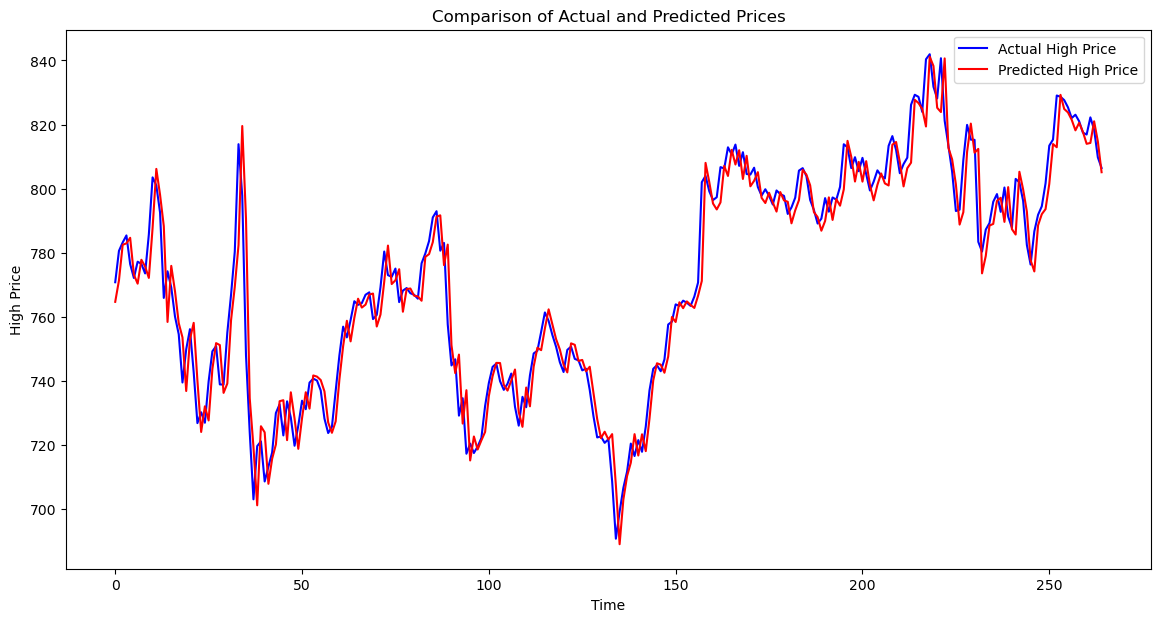

In [224]:
plt.figure(figsize=(14, 7))
plt.plot(y_val_rescaled, label='Actual High Price', color='blue')
plt.plot(y_pred_rescaled, label='Predicted High Price', color='red')
plt.title('Comparison of Actual and Predicted Prices')
plt.xlabel('Time')
plt.ylabel('High Price')
plt.legend()
plt.show()

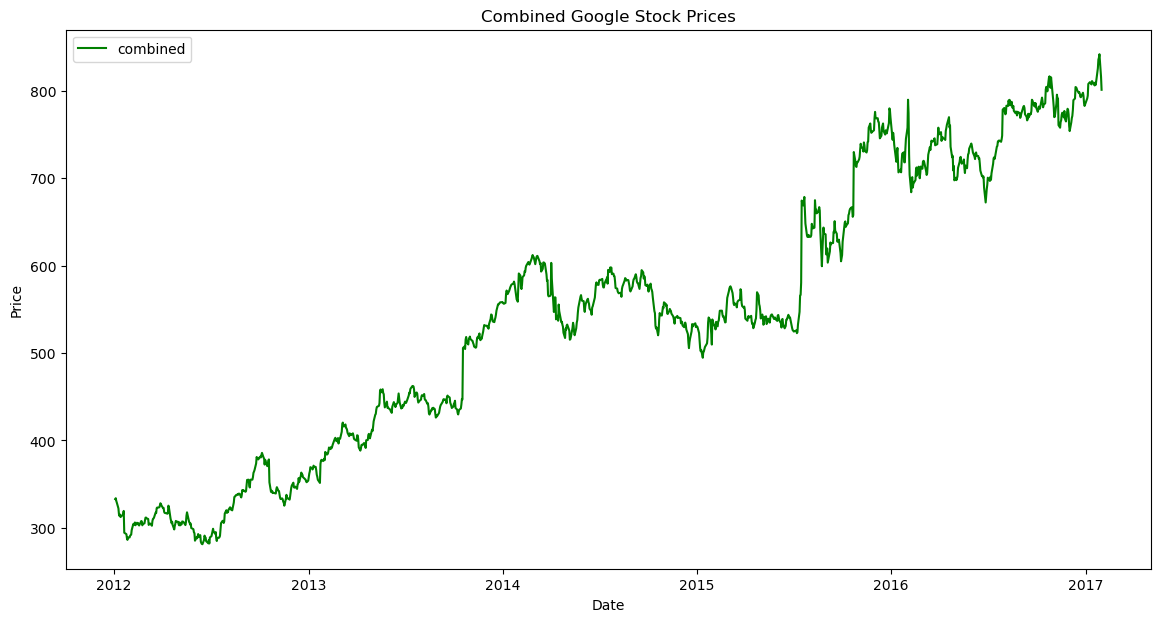

In [225]:
# Plot the combined data
plt.figure(figsize=(14, 7))

# Plot the part from df_test with another color
plt.plot(combined_df[['High']], label='combined', color='green')

plt.title('Combined Google Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [226]:
# Initialize and fit the scaler
scaler = MinMaxScaler(feature_range=(0, 1))
combined_scaled = scaler.fit_transform(combined_df[['High']])  # Scale the 'High' column

# Create sequences from the full combined scaled data
X_combined, y_combined = create_dataset(combined_scaled, look_back)
X_combined = X_combined.reshape((X_combined.shape[0], X_combined.shape[1], 1))  # Reshape for LSTM

# predict
predicted_prices_scaled = best_model.predict(X_combined)
predicted_prices = scaler.inverse_transform(predicted_prices_scaled)

# Append NaN values to align with the original data length for plotting
predicted_prices_full = np.append(np.empty((look_back,))*np.nan, predicted_prices.flatten())

39/39 [==============================] - 0s 4ms/step


In [227]:
df_test_compare = pd.read_csv('data/Google_Stock_Price_Test.csv')
df_test_compare['Date']=pd.to_datetime(df_test_compare['Date'])
df_test_compare.set_index('Date',drop=True,inplace=True)
df_test_compare['Volume'] = df_test_compare['Volume'].str.replace(',', '').astype(float)

Shape of test index: 20
Shape of predicted prices for test period: 20
Shape of actual high prices for test period: 20


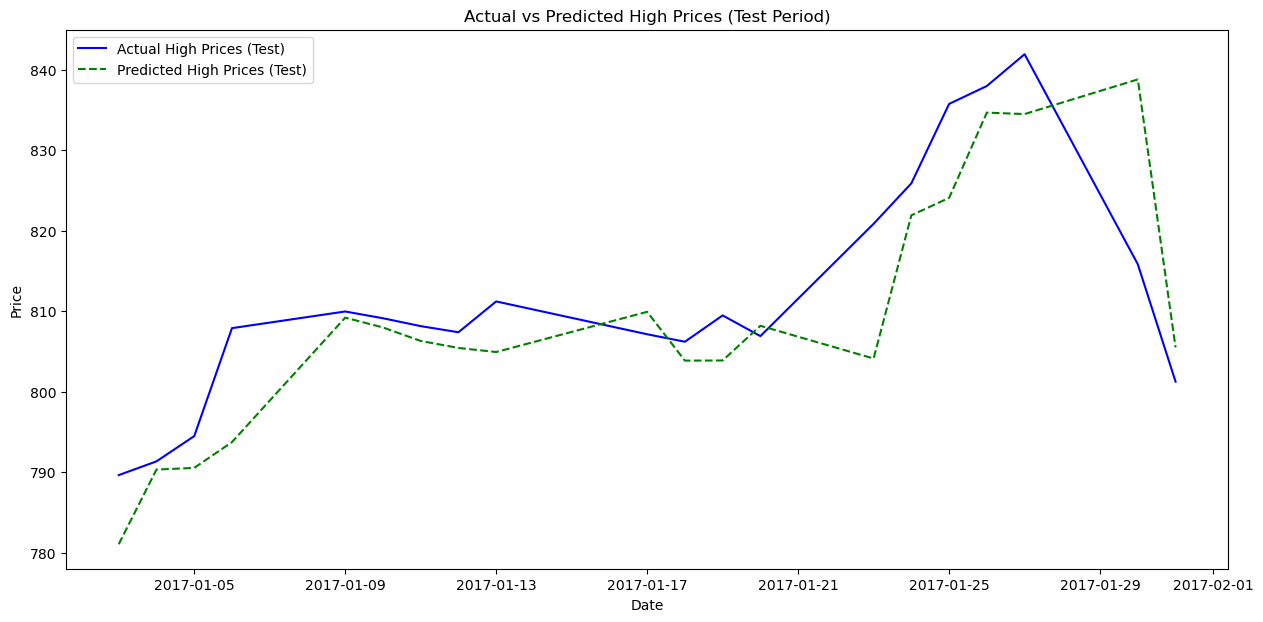

In [228]:
# Assuming 'look_back' is the number of lagged time steps used in the model
# Trim the predicted prices to match the length of the test set
predicted_prices_test_period = predicted_prices_full[-len(df_test.index):]

# Inverse transform the scaled actual high prices to compare with predictions
actual_high_prices = df_test_compare['High'] 

# Ensure the shapes by printing them out
print("Shape of test index:", len(df_test.index))
print("Shape of predicted prices for test period:", len(predicted_prices_test_period))
print("Shape of actual high prices for test period:", len(actual_high_prices))

# Plot the actual vs predicted prices for the test period
plt.figure(figsize=(15, 7))
plt.plot(df_test.index, actual_high_prices, label='Actual High Prices (Test)', color='blue')
plt.plot(df_test.index, predicted_prices_test_period, label='Predicted High Prices (Test)', color='green', linestyle='--')
plt.title('Actual vs Predicted High Prices (Test Period)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [229]:
# Assuming predicted_prices is a numpy array of predictions for the entire dataset
# And actual_prices is a numpy array of actual values corresponding to the latter part of predicted_prices

# Find the starting point for the actual prices within the predicted prices array
start_index = len(predicted_prices) - len(actual_prices)

# Slice the predicted prices to get the portion that corresponds to the actual prices
aligned_predicted_prices = predicted_prices[start_index:]

# # Ensure the arrays are of equal length
# if len(aligned_predicted_prices) > len(actual_prices):
#     aligned_predicted_prices = aligned_predicted_prices[:len(actual_prices)]

# Calculate MSE and MAE using the aligned data
mse = mean_squared_error(actual_prices, aligned_predicted_prices)
mae = mean_absolute_error(actual_prices, aligned_predicted_prices)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 71.55544673137601
Mean Absolute Error (MAE): 6.1058837890625055
